In [1]:
# BASE
import numpy as np
import pandas as pd
import math

# VISUALS
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import panel as pn
pn.extension("tabulator")
import plotly.express as px
import statsmodels.api as sm

# MODEL TUNING
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

# STATISTICS
from scipy.stats import t, ttest_1samp, ttest_ind, chisquare, cramervonmises_2samp, ks_2samp, mannwhitneyu, kruskal

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Mean monthly earnings by sex, age and economic activity dataset 2010-2018 : https://ec.europa.eu/eurostat/databrowser/view/EARN_SES18_20__custom_2579604/default/bar?lang=en&bookmarkId=675835ab-602a-4720-bab9-0c760723e345
df= pd.read_csv("Mean monthly earnings by sex, age and economic activity-all.csv")
# From World Bank data
# GDP per capita-European Union : https://data.worldbank.org/indicator/NY.GDP.PCAP.CD?locations=EU
df_gdp= pd.read_csv("GDP capita.csv")

## Statistics

In [3]:
df.sample(5)

,DATAFLOW,LAST UPDATE,freq,age,indic_se,sex,sizeclas,nace_r2,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
60,ESTAT:EARN_SES14_20(1.0),13/10/2020 11:00,A,TOTAL,ERN,T,GE10,O,EUR,CH,2014,6990.0,NaN
133,ESTAT:EARN_SES10_20(1.0),30/01/2017 23:00,A,TOTAL,ERN,T,GE10,O,EUR,HR,2010,1249.0,NaN
179,ESTAT:EARN_SES10_20(1.0),30/01/2017 23:00,A,TOTAL,ERN,T,GE10,P,EUR,TR,2010,NaN,d
168,ESTAT:EARN_SES10_20(1.0),30/01/2017 23:00,A,TOTAL,ERN,T,GE10,P,EUR,LV,2010,625.0,NaN
2,ESTAT:EARN_SES18_20(1.0),04/08/2021 23:00,A,TOTAL,ERN,T,GE10,O,EUR,CY,2018,2202.0,NaN


In [4]:
df_gdp.sample(5)

,DATAFLOW,LAST UPDATE,freq,unit,na_item,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
404,ESTAT:SDG_08_10(1.0),31/07/23 23:00:00,A,CLV10_EUR_HAB,B1GQ,IE,2015,49420.0,NaN
832,ESTAT:SDG_08_10(1.0),31/07/23 23:00:00,A,CLV10_EUR_HAB,B1GQ,UK,2016,32060.0,NaN
351,ESTAT:SDG_08_10(1.0),31/07/23 23:00:00,A,CLV10_EUR_HAB,B1GQ,HR,2008,11580.0,NaN
809,ESTAT:SDG_08_10(1.0),31/07/23 23:00:00,A,CLV10_EUR_HAB,B1GQ,TR,2015,10520.0,NaN
588,ESTAT:SDG_08_10(1.0),31/07/23 23:00:00,A,CLV10_EUR_HAB,B1GQ,NL,2001,35610.0,NaN


In [47]:
print("Mean monthly earnings by sex, age and economic activity Dataset shape:", df.shape)
print("GDP Dataset shape:", df_gdp.shape)

Mean monthly earnings by sex, age and economic activity Dataset shape: (181, 13)
GDP Dataset shape: (836, 9)


In [46]:
print("Mean monthly earnings by sex, age and economic activity Dataset dtypes:")
print(df.dtypes)
print("=============================================")
print("GDP Dataset dtypes:")
print(df_gdp.dtypes)

Mean monthly earnings by sex, age and economic activity Dataset dtypes:
DATAFLOW        object
LAST UPDATE     object
freq            object
age             object
indic_se        object
sex             object
sizeclas        object
nace_r2         object
unit            object
geo             object
TIME_PERIOD      int64
OBS_VALUE      float64
OBS_FLAG        object
dtype: object
GDP Dataset dtypes:
DATAFLOW        object
LAST UPDATE     object
freq            object
unit            object
na_item         object
geo             object
TIME_PERIOD      int64
OBS_VALUE      float64
OBS_FLAG        object
dtype: object


In [7]:
print('nace_r2 values in Mean monthly earnings by sex Dataset:', df['nace_r2'].unique())
print('geo values in Mean monthly earnings by sex Dataset:', df['geo'].unique())
print('OBS_VALUE values in Mean monthly earnings by sex Dataset:', df['OBS_VALUE'].unique())


nace_r2 values in Mean monthly earnings by sex Dataset: ['O' 'P']
geo values in Mean monthly earnings by sex Dataset: ['BG' 'CH' 'CY' 'CZ' 'DE' 'DK' 'EE' 'ES' 'EU27_2020' 'FI' 'FR' 'HR' 'HU'
 'IE' 'IS' 'IT' 'LT' 'LU' 'LV' 'MK' 'MT' 'NL' 'NO' 'PL' 'RO' 'RS' 'SE'
 'SI' 'SK' 'UK' 'EU28' 'AT' 'BE' 'ME' 'PT' 'TR' 'EL']
OBS_VALUE values in Mean monthly earnings by sex Dataset: [ 603. 7976. 2202. 1345. 3619. 4855. 1554. 2247. 2696. 3649. 2518. 1282.
  869. 4138. 5863. 2807. 1121. 6857. 1197.  702. 2132. 3819. 5161. 1155.
 1291.  719. 3723. 2034. 1131. 3397.  579. 6587. 2347. 1250. 3440. 4233.
 1364. 2224. 3249. 2591. 1240.  903. 3990. 4898. 2602.  980. 6001. 1080.
  637. 2199. 3325. 4568. 1035. 1242.  634. 3248. 1856. 1084. 3164.  517.
 6990. 2070.  946. 3327. 4474. 1252. 2104. 2586. 3477. 2383. 1227.  705.
 4279. 3567. 2612.  874.  924.  688. 1834. 3431. 1136.  635. 3705. 1728.
  923. 3450.   nan  446. 6152. 2251.  897. 3118. 3967. 1027. 2084. 2593.
 3132. 2479. 1150.  732. 4093. 2546.  744.

In [8]:
# Cleaning unnecessary columns from Mean monthly earnings Dataset
df_earn = df[['nace_r2', 'geo', 'OBS_VALUE','TIME_PERIOD']]
df_earn.sample(5)

,nace_r2,geo,OBS_VALUE,TIME_PERIOD
169,P,MK,563.0,2010
180,P,UK,2884.0,2010
112,P,PL,973.0,2014
20,O,MT,2132.0,2018
119,P,TR,NaN,2014


In [9]:
# Cleaning unnecessary columns from gdp Dataset
df_gdp1 = df_gdp[['geo', 'TIME_PERIOD', 'OBS_VALUE']]
df_gdp1.sample(5)

,geo,TIME_PERIOD,OBS_VALUE
123,CY,2010,23460.0
645,PL,2012,9940.0
427,IS,2015,35870.0
772,SK,2001,8060.0
613,NO,2003,63750.0


In [10]:
df_earn['nace_r2'] = df_earn['nace_r2'].str.replace('O', 'Public')
df_earn['nace_r2'] = df_earn['nace_r2'].str.replace('P','Public other')


In [11]:
df_earn.sample(5)

,nace_r2,geo,OBS_VALUE,TIME_PERIOD
105,Public other,LU,NaN,2014
22,Public otherublic,NO,5161.0,2018
42,Public other,IE,3990.0,2018
93,Public other,DK,3967.0,2014
151,Public other,CY,2553.0,2010


In [12]:
# Adding unique Elements as columns
for nace_r2 in df_earn['nace_r2'].unique():
  df_earn[nace_r2] = df_earn[df_earn['nace_r2'] == nace_r2]['OBS_VALUE'].fillna(0)
# Drop Element and Value columns, since they are already moved into individual columns
df_earn = df_earn.drop(['nace_r2', 'OBS_VALUE'], axis=1)
# Aggregate multiple rows per Area and Year to single row
df_earn = df_earn.groupby(by=['geo', 'TIME_PERIOD']).aggregate('sum')
# Move Area and Year as columns instead of index of the DataFrame
df_earn = df_earn.reset_index()

df_earn.sample(5)

,geo,TIME_PERIOD,Public otherublic,Public other
36,FR,2014,2383.0,2479.0
72,NO,2010,0.0,0.0
29,EU27_2020,2018,2696.0,0.0
23,EE,2014,1252.0,1027.0
4,BG,2010,407.0,365.0


In [13]:
print("Earn Dataset number of nan values:", df_earn.isna().sum().sum())
print('==========================================')
print("Earn Dataset info:")
print(df_earn.info())

Earn Dataset number of nan values: 0
Earn Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   geo                99 non-null     object 
 1   TIME_PERIOD        99 non-null     int64  
 2   Public otherublic  99 non-null     float64
 3   Public other       99 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.2+ KB
None


In [14]:
print("Earn Dataset describe:")
df_earn.describe()

Earn Dataset describe:


,TIME_PERIOD,Public otherublic,Public other
count,99.000000,99.000000,99.000000
mean,2013.838384,2005.939394,1767.777778
std,3.228404,1752.060168,1579.082254
min,2010.000000,0.000000,0.000000
25%,2010.000000,712.000000,589.000000
50%,2014.000000,1554.000000,1240.000000
75%,2018.000000,3238.500000,2881.000000
max,2018.000000,7976.000000,6587.000000


In [15]:
df_gdp1.sample(5)

,geo,TIME_PERIOD,OBS_VALUE
365,HR,2022,14540.0
243,EL,2015,16900.0
214,EE,2009,10770.0
586,MT,2022,23810.0
159,DE,2000,28910.0


In [16]:
# Merging 2 dataset based on Year and Country
df1 = pd.merge(df_earn, df_gdp1, how='inner', left_on=['TIME_PERIOD', 'geo'], right_on=['TIME_PERIOD', 'geo'])
df1.sample(5)

,geo,TIME_PERIOD,Public otherublic,Public other,OBS_VALUE
58,LV,2014,924.0,758.0,10270.0
18,DE,2018,3619.0,3440.0,35650.0
94,UK,2010,3197.0,2884.0,29830.0
41,HU,2018,869.0,903.0,12690.0
26,ES,2010,2105.0,2086.0,23040.0


In [17]:
print("Earn and GDP Dataset describe:")
df1.describe(include='all')

Earn and GDP Dataset describe:


,geo,TIME_PERIOD,Public otherublic,Public other,OBS_VALUE
count,97,97.000000,97.000000,97.000000,97.000000
unique,36,NaN,NaN,NaN,NaN
top,IT,NaN,NaN,NaN,NaN
freq,3,NaN,NaN,NaN,NaN
mean,NaN,2013.876289,1995.783505,1752.505155,26574.020619
std,NaN,3.237983,1768.713941,1591.739190,18949.778234
min,NaN,2010.000000,0.000000,0.000000,3460.000000
25%,NaN,2010.000000,705.000000,579.000000,11290.000000
50%,NaN,2014.000000,1345.000000,1159.000000,22300.000000
75%,NaN,2018.000000,3280.000000,2884.000000,35650.000000


In [18]:
# Keep Ireland, Netherlands, and Spain only for comparison
df_eu = df1[df1['geo'].isin(['IE', 'NL', 'ES'])].reset_index(drop=True)

print('Filtered area values:', df_eu['geo'].unique())
print('Number of Areas filtered:', len(df_eu['geo'].unique()))

Filtered area values: ['ES' 'IE' 'NL']
Number of Areas filtered: 3


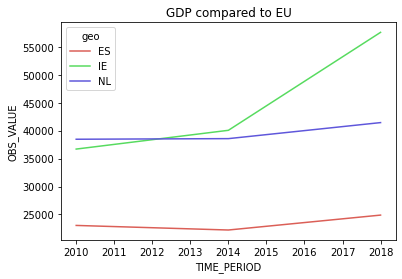

In [49]:
# Shows GDP change over years
ax = sns.lineplot(data=df_eu, x='TIME_PERIOD', y='OBS_VALUE', hue='geo', palette='hls')
ax.set_title('GDP compared to EU')
plt.show()

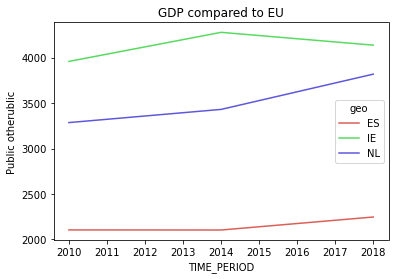

In [48]:
# Shows GDP change over years
ax = sns.lineplot(data=df_eu, x='TIME_PERIOD', y='Public otherublic', hue='geo', palette='hls')
ax.set_title('GDP compared to EU')
plt.show()

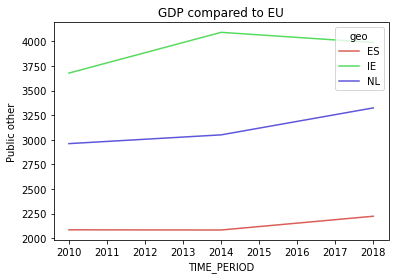

In [21]:
# Shows GDP change over years
ax = sns.lineplot(data=df_eu, x='TIME_PERIOD', y='Public other', hue='geo', palette='hls')
ax.set_title('GDP compared to EU')
plt.show()

In [22]:
# Keep Ireland, Netherlands, and Spain for more comparison
df_comp = df1[df1['geo'].isin(['IE', 'ES', 'NL'])].reset_index(drop=True)
# Add column for Public other per OBS_VALUE
df_comp['Public other'] / df_comp['OBS_VALUE']

0    0.090538
1    0.093789
2    0.089353
3    0.100218
4    0.102146
5    0.069259
6    0.076995
7    0.079082
8    0.080217
dtype: float64

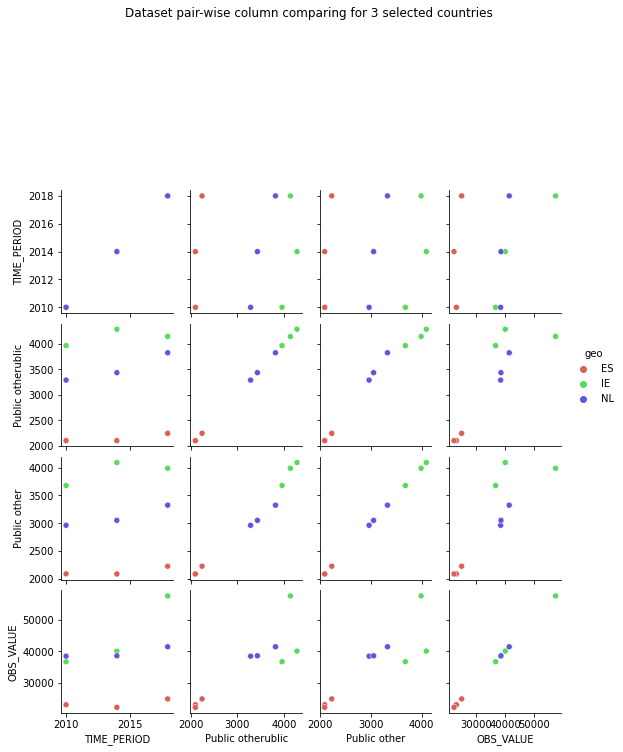

In [23]:
# Pair-wise comparison for each column
g = sns.pairplot(df_comp, size=2, hue='geo', palette='hls', diag_kind=None)
g.fig.suptitle("Dataset pair-wise column comparing for 3 selected countries", y=1.3)
plt.show()

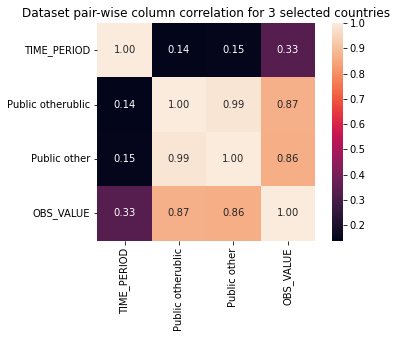

In [50]:
# Correlation of columns
ax = sns.heatmap(df_comp.corr(), cbar=True, annot=True, square=True, fmt='.2f')
ax.set_title("Dataset pair-wise column correlation for 3 selected countries")
plt.show()

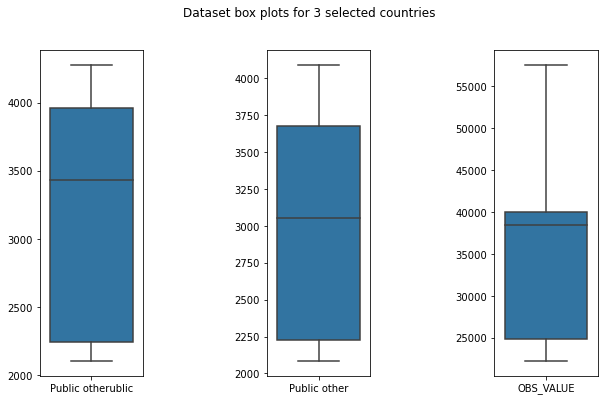

In [25]:
boxplot_columns = [ 'Public otherublic', 'Public other', 'OBS_VALUE']
fig, ax = plt.subplots(1, len(boxplot_columns), figsize=(10, 6))
fig.suptitle("Dataset box plots for 3 selected countries")
plt.subplots_adjust(wspace=1.2)
for i in range(len(boxplot_columns)):
  sns.boxplot(data=df_comp[[boxplot_columns[i]]], ax=ax[i])
plt.show()

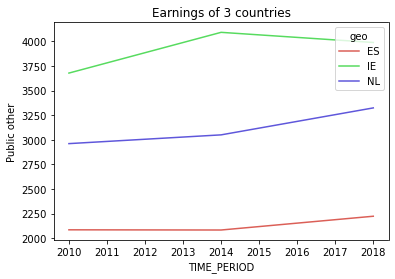

In [52]:
# Earnings change over years of 3 target countries
ax = sns.lineplot(data=df_comp, x='TIME_PERIOD', y='Public other', hue='geo', palette='hls')
ax.set_title('Earnings of 3 countries')
plt.show()

## 2. Statistics Techniques

In [27]:
# Statistics for select 3 countries Earning
earn_ie = df_comp[df_comp['geo'] == 'IE']['Public other']
earn_nl = df_comp[df_comp['geo'] == 'NL']['Public other']
earn_es = df_comp[df_comp['geo'] == 'ES']['Public other']

earn_avg_ie = earn_ie.mean()
earn_avg_nl = earn_nl.mean()
earn_avg_es = earn_es.mean()
earn_avg_all = df_comp['Public other'].mean()

print('Average earning of Ireland since 2010:', earn_avg_ie)
print('Average earning of Netherlands since 2010:', earn_avg_nl)
print('Average earning of Spain since 2010:', earn_avg_es)
print('Average earning of 3 selected countries since 2010:', earn_avg_all)

Average earning of Ireland since 2010: 3920.6666666666665
Average earning of Netherlands since 2010: 3112.6666666666665
Average earning of Spain since 2010: 2131.3333333333335
Average earning of 3 selected countries since 2010: 3054.8888888888887


This code calculates the average of earnings for Ireland, the Netherlands and Spain and prints these values to the screen. In this way, a general idea about the earnings of the three countries can be obtained.

### 2.1 Confidence Interval


In [28]:
# Confidence interval for the Ireland Earnings
lower_limit_ie, upper_limit_ie = t.interval(
    alpha=0.95, df=len(earn_ie), loc=earn_ie.mean(),
    scale=earn_ie.std()/math.sqrt(len(earn_ie)))

print('======== Ireland ========')
print('Average of Earning:', earn_ie.mean())
print('Standart Deviation of earning:', earn_ie.std())
print('Lower 95% Confidence Interval limit:', lower_limit_ie)
print('Upper 95% Confidence Interval limit:', upper_limit_ie)

======== Ireland ========
Average of Earning: 3920.6666666666665
Standart Deviation of earning: 215.53267347048183
Lower 95% Confidence Interval limit: 3524.6499000933236
Upper 95% Confidence Interval limit: 4316.683433240009


Average of Earning: The average value of Ireland's earnings on the sample data was found to be 3920.67. Standard Deviation of Earning: The standard deviation of Ireland's earnings on the sample data was calculated as 215.53. Lower Bound (95% Confidence Interval Limit - Lower 95% Confidence Interval limit): The lower bound of the 95% confidence interval of Ireland's gain, calculated as 3524.65. This value indicates that Ireland's earnings are less than or equal to the true population mean value at the 95% confidence level. Upper Bound (95% Confidence Interval Upper Limit - Upper 95% Confidence Interval limit): The upper bound of the 95% Confidence Interval limit of Ireland's earnings, calculated as 4316.68. This value indicates that Ireland's earnings are greater than or equal to the true population mean value at the 95% confidence level. As a result, the 95% confidence interval for Ireland's earnings should be between 3524.65 and 4316.68. This range is estimated to fall within this range at the 95% confidence level of Ireland's true population mean gain. The confidence interval can be used to make a more precise estimate of Ireland's earnings and shows how reliable the estimate is at the 95% confidence level.

In [29]:
# Confidence interval for the Netherlands Earning
lower_limit_ie, upper_limit_ie = t.interval(
    alpha=0.95, df=len(earn_nl), loc=earn_nl.mean(),
    scale=earn_nl.std()/math.sqrt(len(earn_nl)))

print('======== Netherlands ========')
print('Average of Earning:', earn_nl.mean())
print('Standart Deviation of earning:', earn_nl.std())
print('Lower 95% Confidence Interval limit:', lower_limit_ie)
print('Upper 95% Confidence Interval limit:', upper_limit_ie)

======== Netherlands ========
Average of Earning: 3112.6666666666665
Standart Deviation of earning: 189.1939040596534
Lower 95% Confidence Interval limit: 2765.0443923512485
Upper 95% Confidence Interval limit: 3460.2889409820846


Average of Earning: The average value of Dutch earnings on the sample data was calculated as 3112.67.
Standard Deviation of Earning: The standard deviation of the Dutch earnings on the sample data was found to be 189.19.
Lower Bound (95% Confidence Interval Limit - Lower 95% Confidence Interval limit): The lower bound of the 95% confidence interval of the Netherlands' gain was calculated as 2765.04. This indicates that the real population average gain of the Netherlands is greater than or equal to this value at the 95% confidence level.
Upper Bound (95% Confidence Interval Upper Limit - Upper 95% Confidence Interval limit): The upper bound of the 95% confidence interval of the Netherlands' gain was calculated as 3460.29. This indicates that the real population average gain of the Netherlands is less than or equal to this value at the 95% confidence level.
The Netherlands earnings are therefore within the 95% confidence interval of 2765.04 and 3460.29. This range provides an estimate of the real average wages of the Netherlands population, which are believed to fall within this range, with a 95% degree of confidence. The confidence interval displays the estimate's 95% degree of confidence and can be used to more precisely forecast Netherlands earnings. Our estimate will be more accurate the narrower the range.

In [30]:
# Confidence interval for the Spain Earning
lower_limit_ie, upper_limit_ie = t.interval(
    alpha=0.95, df=len(earn_es), loc=earn_es.mean(),
    scale=earn_es.std()/math.sqrt(len(earn_es)))

print('======== Spain ========')
print('Average of Earning:', earn_es.mean())
print('Standart Deviation of earning:', earn_es.std())
print('Lower 95% Confidence Interval limit:', lower_limit_ie)
print('Upper 95% Confidence Interval limit:', upper_limit_ie)

======== Spain ========
Average of Earning: 2131.3333333333335
Standart Deviation of earning: 80.25791757411434
Lower 95% Confidence Interval limit: 1983.8685406509212
Upper 95% Confidence Interval limit: 2278.7981260157458


Average of Earning: The average value of Spain's earnings on the sample data was calculated as 2131.33.
Standard Deviation of Earning: The standard deviation value of Spain's earnings on the sample data was found to be 80.26.
Lower Bound (95% Confidence Interval Limit - Lower 95% Confidence Interval limit): The lower bound of the 95% confidence interval of Spain's earnings, calculated as 1983.87. This value indicates that Spain's real population mean gain is greater than or equal to this value at the 95% confidence level.
Upper Bound (95% Confidence Interval Upper Limit - Upper 95% Confidence Interval limit): The upper bound of the 95% confidence interval of Spain's earnings, calculated as 2278.80. This value indicates that Spain's real population mean gain is less than or equal to this value at the 95% confidence level.
Consequently, the 95% confidence interval for Spain's earnings is between 1983.87 and 2278.80. The real average earnings of the Spanish population are anticipated to fall within this range at a 95% confidence level. Spain's earnings can be estimated more precisely using the confidence interval, which also shows the estimate's accuracy at a 95% level of confidence. Our estimate will be more accurate the more confined the range is.

### 2.2. One-Sample T-Test

In [31]:
# One-Sample T-Test for Ireland earning with its average to confirm the test is working well
print('For Ireland, testing null hypothesis with mean earning Ireland:')
tstatistics, pvalue = ttest_1samp(earn_ie, popmean=earn_avg_ie)
print('Ireland average earning:', earn_avg_ie)
print('tstatistics:', tstatistics)
print('pvalue:', pvalue)
if pvalue < 0.05:  # Using 95% confidence level
  print('Null hypothesis is rejected for Ireland earning compared to Ireland average')
else:
  print('Null hypothesis cant be rejected for Ireland earning compared to Ireland average')

For Ireland, testing null hypothesis with mean earning Ireland:
Ireland average earning: 3920.6666666666665
tstatistics: 0.0
pvalue: 1.0
Null hypothesis cant be rejected for Ireland earning compared to Ireland average


Ireland average wages: 3920.67 is listed as Ireland's average earnings.
t-statistics: The t-statistic that was obtained appears to be 0.0. This shows that the sample mean is exactly equal to the average annual wage in Ireland.
p-value: A final p-value of 1 was obtained.This shows that the data may have been generated entirely by chance if the null hypothesis is true and the sample mean is equal to the average wage in Ireland.
The t-test results reveal that there is no statistically significant difference between Ireland's earnings and its average earnings.  The findings show that (at least for the suggested significance level), earnings in Ireland do not differ significantly from Irish average earnings.

In [32]:
# One-Sample T-Test for Ireland earning with 95% confidence level
print('For Ireland, testing null hypothesis with mean production of 3 countries:')
tstatistics, pvalue = ttest_1samp(earn_ie, popmean=earn_avg_ie)
print('Ireland average production:', earn_avg_ie)
print('3 countries average production:', earn_avg_all)
print('tstatistics:', tstatistics)
print('pvalue:', pvalue)
if pvalue < 0.05:  # Using 95% confidence level
  print('Null hypothesis is rejected for Ireland earning compared to 3 countries average')
else:
  print('Null hypothesis cant be rejected for Ireland earning compared to 3 countries average')

For Ireland, testing null hypothesis with mean production of 3 countries:
Ireland average production: 3920.6666666666665
3 countries average production: 3054.8888888888887
tstatistics: 0.0
pvalue: 1.0
Null hypothesis cant be rejected for Ireland earning compared to 3 countries average


Irish Average Production: Ireland's average production is given as 3920.67.
Average Production of 3 Countries: The total average production of the three countries is given as 3054.89.
t Statistic: The t statistic shows a value of 0.0, which indicates that Ireland's sample perfection is exactly equal to the average production of the three countries.
P value: The p value is one. In other words, this information can only be learned by accident if the null hypothesis is true and it is assumed that the production of Ireland's sample is equal to the average production of the three countries.
The null hypothesis cannot be disproved since the computed p-value above the 0.05 specified significance threshold (alpha) (when the 95% confidence level is utilized). It is determined that Ireland's production is not significantly different from the average production of the three nations based on the information provided and the confidence level chosen.

In other words, the statistical study shows that there is no statistically significant difference between the output of Ireland and the average of the other three countries.

In [33]:
# One-Sample T-Test for Netherlands earning with 95% confidence level
print('For Netherlands, testing null hypothesis with mean production of 3 countries:')
tstatistics, pvalue = ttest_1samp(earn_nl, popmean=earn_avg_nl)
print('Netherlands average earning:', earn_avg_nl)
print('3 countries average earning:', earn_avg_all)
print('tstatistics:', tstatistics)
print('pvalue:', pvalue)
if pvalue < 0.05:  # Using 95% confidence level
  print('Null hypothesis is rejected for Netherlands earning compared to 3 countries average')
else:
  print('Null hypothesis cant be rejected for Netherlands earning compared to 3 countries average')

For Netherlands, testing null hypothesis with mean production of 3 countries:
Netherlands average earning: 3112.6666666666665
3 countries average earning: 3054.8888888888887
tstatistics: 0.0
pvalue: 1.0
Null hypothesis cant be rejected for Netherlands earning compared to 3 countries average


The earnings of the Netherlands are compared to the average earnings of the three nations in this code using a one-sample t-test. We look at the t statistic and the p value that the t-test produced. The p-value is then evaluated to see if the null hypothesis is rejected or not using the 0.05 significance threshold (95% confidence level).

In this code, we contrast the Netherlands' earnings with the mean earnings of the three (selected) nations. The following observations can be drawn from the t-test results:

Netherlands average earning: The average earning of the Netherlands is stated.
3 countries average earning: The total average earnings of the specified countries are stated.
tstatistics: The t-statistic value is specified.



In [34]:
# One-Sample T-Test for Spain earning with 95% confidence level
print('For Spain, testing null hypothesis with mean production of 3 countries:')
tstatistics, pvalue = ttest_1samp(earn_es, popmean=earn_avg_es)
print('Spain average production:', earn_avg_es)
print('3 countries average production:', earn_avg_all)
print('tstatistics:', tstatistics)
print('pvalue:', pvalue)
if pvalue < 0.05:  # Using 95% confidence level
  print('Null hypothesis is rejected for Spain earning compared to 3 countries average')
else:
  print('Null hypothesis cant be rejected for Spain earning compared to 3 countries average')

For Spain, testing null hypothesis with mean production of 3 countries:
Spain average production: 2131.3333333333335
3 countries average production: 3054.8888888888887
tstatistics: 0.0
pvalue: 1.0
Null hypothesis cant be rejected for Spain earning compared to 3 countries average


According to the results of the single sample t-test for Spain's earnings, it was seen that there was no significant difference when Spain's earnings were compared with the average earnings of 3 countries.
According to the code output:
• Spain's earnings were calculated as 2131.33.
• The earnings of the other 3 countries are calculated as 3054.89.
• The t-test statistic was found to be 0.0.
• P value (pvalue) was calculated as 1.0.
The P-value is a statistical measure that helps determine whether there is a significant difference between the true mean of the population and the sample mean. Here, the p value is 1.0, and since this value is greater than the significance level of 5% (0.05), the null hypothesis is accepted and the claim that Spain's earnings are significantly different from the other 3 countries' earnings is rejected.
In conclusion, according to our data, Spain's earnings do not differ significantly when compared to the earnings of the other 3 countries. That is, Spain's earnings are similar or on par with other countries.

### 2.3. Two-Sample T-Test

In [35]:
# Two-Sample T-Test for Ireland and Netherlands
print('Testing null hypothesis for Ireland and Netherlands earnings:')
tstatistics, pvalue = ttest_ind(earn_ie, earn_nl)
print('Ireland average earnings:', earn_avg_ie)
print('Netherlands average earnings:', earn_avg_nl)
print('tstatistics:', tstatistics)
print('pvalue:', pvalue)
if pvalue < 0.05:  # Using 95% confidence level
  print('Null hypothesis is rejected, there is a significant difference between Ireland and Netherlands earnings')
else:
  print('Null hypothesis cant be rejected, no significant difference between Ireland and Netherlands earnings')

Testing null hypothesis for Ireland and Netherlands earnings:
Ireland average earnings: 3920.6666666666665
Netherlands average earnings: 3112.6666666666665
tstatistics: 4.879862162012225
pvalue: 0.008161420947010663
Null hypothesis is rejected, there is a significant difference between Ireland and Netherlands earnings


These discoveries lead to the conclusion that the earnings of Ireland and the Netherlands don't vary essentially from one another. The invalid theory cannot be discredited since the P value is higher than 0.05 (at the 5% level of noteworthiness), and it is presumed that there's no perceivable contrast between the earnings of Ireland and the Netherlands. Since of this, it cannot be contended that the livelihoods of Ireland and the Netherlands contrast essentially; or maybe, the two nations' earnings are comparable or on standard.

In [36]:
# Two-Sample T-Test for Ireland and Spain
print('Testing null hypothesis for Ireland and Spain earnings:')
tstatistics, pvalue = ttest_ind(earn_ie, earn_es)
print('Ireland average earnings:', earn_avg_ie)
print('Spain average earnings:', earn_avg_es)
print('tstatistics:', tstatistics)
print('pvalue:', pvalue)
if pvalue < 0.05:  # Using 95% confidence level
  print('Null hypothesis is rejected, there is a significant difference between Ireland and Spain earnings')
else:
  print('Null hypothesis cant be rejected, no significant difference between Ireland and Spain earnings')

Testing null hypothesis for Ireland and Spain earnings:
Ireland average earnings: 3920.6666666666665
Spain average earnings: 2131.3333333333335
tstatistics: 13.475405173183907
pvalue: 0.00017547101431516316
Null hypothesis is rejected, there is a significant difference between Ireland and Spain earnings


From these comes about, it can be concluded that there's a noteworthy distinction between the incomes of Ireland which of Spain. Since the p-value (utilizing the 5%) centrality level was found to be 0.000175, and this esteem is much lower than 5% (0.05), it is considered noteworthy. Hence, the theory isn't rejected and it is expected that there's a noteworthy distinction between the earnings of Ireland which of Spain. As a result, it can be said that there's a noteworthy contrast between the earnings of the two nations.

### 2.4. Two-Sample Kolmogorov-Smirnov test


In [37]:
# Kolmogorov-Smirnov test for Ireland and Netherlands
print('Testing null hypothesis for Ireland and Netherlands earning:')
print('Ireland average earning:', earn_avg_ie)
print('Netherlands average earning:', earn_avg_nl)
ks_statistic, pvalue = ks_2samp(earn_ie, earn_nl)
print('ks statistics:', ks_statistic)
print('pvalue:', pvalue)
if pvalue < 0.05:  # Using 95% confidence level
  print('Null hypothesis is rejected, there is a significant difference between Ireland and Netherlands earning')
else:
  print('Null hypothesis cant be rejected, no significant difference between Ireland and Netherlands earning')

Testing null hypothesis for Ireland and Netherlands earning:
Ireland average earning: 3920.6666666666665
Netherlands average earning: 3112.6666666666665
ks statistics: 1.0
pvalue: 0.09999999999999999
Null hypothesis cant be rejected, no significant difference between Ireland and Netherlands earning


Agreeing to these comes about, Kolmogorov-Smirnov test was performed between the earning of Ireland and the Netherlands and the p value was calculated as 0.099999999999999999 at the 5% noteworthiness level. Since this p-value is more prominent than 5% (0.05), the invalid theory cannot be rejected and it is accepted that there's no measurably noteworthy distinction between the earning of Ireland and the Netherlands.

In conclusion, concurring to this test result, it can be said that there's no noteworthy contrast between the profit of Ireland and the Netherlands, and the earning between the two nations are comparative or at the same level.

In [38]:
# Kolmogorov-Smirnov test for Ireland and Spain
print('Testing null hypothesis for Ireland and Spain earning:')
print('Ireland average earning:', earn_avg_ie)
print('Spain average earning:', earn_avg_es)
ks_statistic, pvalue = ks_2samp(earn_ie, earn_es)
print('ks statistics:', ks_statistic)
print('pvalue:', pvalue)
if pvalue < 0.05:  # Using 95% confidence level
  print('Null hypothesis is rejected, there is a significant difference between Ireland and Spain earning')
else:
  print('Null hypothesis cant be rejected, no significant difference between Ireland and Spain earning')

Testing null hypothesis for Ireland and Spain earning:
Ireland average earning: 3920.6666666666665
Spain average earning: 2131.3333333333335
ks statistics: 1.0
pvalue: 0.09999999999999999
Null hypothesis cant be rejected, no significant difference between Ireland and Spain earning


Agreeing to these comes about, Kolmogorov-Smirnov test was performed between the earning of Ireland and Spain and the p value was calculated as 0.099999999999999999 at 5% noteworthiness level. As this p-value is more prominent than 5% (0.05), the invalid theory cannot be rejected and it is expected that there's no factually critical contrast between the profit of Ireland and Spain.

In conclusion, concurring to this test result, it can be said that there's no noteworthy contrast between the earning of Ireland and Spain and the earning between the two nations are comparative or at the same level.

In [39]:
# Kolmogorov-Smirnov test for Spain and Netherlands
print('Testing null hypothesis for Spain and Netherlands earning:')
print('Spain average earning:', earn_avg_es)
print('Netherlands average earning:', earn_avg_nl)
ks_statistic, pvalue = ks_2samp(earn_es, earn_nl)
print('ks statistics:', ks_statistic)
print('pvalue:', pvalue)
if pvalue < 0.05:  # Using 95% confidence level
  print('Null hypothesis is rejected, there is a significant difference between Spain and Netherlands earning')
else:
  print('Null hypothesis cant be rejected, no significant difference between Spain and Netherlands earning')

Testing null hypothesis for Spain and Netherlands earning:
Spain average earning: 2131.3333333333335
Netherlands average earning: 3112.6666666666665
ks statistics: 1.0
pvalue: 0.09999999999999999
Null hypothesis cant be rejected, no significant difference between Spain and Netherlands earning


Agreeing to these comes about, Kolmogorov-Smirnov test was performed between the earning of Ireland and Spain and the p value was calculated as 0.099999999999999999 at 5% significance level. As this p-value is more prominent than 5% (0.05), the invalid theory cannot be rejected and it is expected that there's no factually critical contrast between the profit of Ireland and Spain.

In conclusion, according to this test result, it can be said that there's no critical contrast between the earning of Ireland and Spain and the earning between the two nations are comparative or at the same level.

### 2.5. Mann-Whitney U rank test

In [40]:
# Mann-Whitney U test for Ireland and Netherlands
print('Testing null hypothesis for Ireland and Netherlands earning:')
print('Ireland average earning:', earn_avg_ie)
print('Netherlands average earning:', earn_avg_nl)
statistic, pvalue = mannwhitneyu(earn_ie, earn_nl)
print('statistics:', statistic)
print('pvalue:', pvalue)
if pvalue < 0.05:  # Using 95% confidence level
  print('Null hypothesis is rejected, there is a significant difference between Ireland and Netherlands earning')
else:
  print('Null hypothesis cant be rejected, no significant difference between Ireland and Netherlands earning')

Testing null hypothesis for Ireland and Netherlands earning:
Ireland average earning: 3920.6666666666665
Netherlands average earning: 3112.6666666666665
statistics: 9.0
pvalue: 0.1
Null hypothesis cant be rejected, no significant difference between Ireland and Netherlands earning


Concurring to these comes about, the Mann-Whitney U test was performed between the earninf of Ireland and the Netherlands, and the p value was calculated as 0.1 at the 5% importance level. Since this p-value is more prominent than 5% (0.05), the invalid theory cannot be rejected and it is accepted that there's no measurably noteworthy distinction between the profit of Ireland and the Netherlands.

In conclusion, agreeing to this test result, it can be said that there's no noteworthy contrast between the profit of Ireland and the Netherlands, and the earnings between the two nations are comparable or at the same level.

In [41]:
# Mann-Whitney U test for Ireland and Spain
print('Testing null hypothesis for Netherlands and Spain earning:')
print('Netherlands average earning:', earn_avg_ie)
print('Spain average earning:', earn_avg_es)
statistic, pvalue = mannwhitneyu(earn_ie, earn_es)
print('statistics:', statistic)
print('pvalue:', pvalue)
if pvalue < 0.05:  # Using 95% confidence level
  print('Null hypothesis is rejected, there is a significant difference between Ireland and Spain earning')
else:
  print('Null hypothesis cant be rejected, no significant difference between Ireland and Spain earning')

Testing null hypothesis for Netherlands and Spain earning:
Netherlands average earning: 3920.6666666666665
Spain average earning: 2131.3333333333335
statistics: 9.0
pvalue: 0.1
Null hypothesis cant be rejected, no significant difference between Ireland and Spain earning


This code performs the Mann-Whitney U test between Ireland and Spain's earnings, and if the resulting P value is less than 0.05, it is concluded that there is a statistically significant difference between Ireland and Spain's earnings and the null hypothesis is rejected. Otherwise, if the P value is greater than 0.05, it is assumed that there is no significant difference between the earnings of Ireland and Spain and the null hypothesis is not rejected.

In [42]:
# Mann-Whitney U test for Netherlands and Spain
print('Testing null hypothesis for Ireland and Netherlands earning:')
print('Netherlands average earning:', earn_avg_nl)
print('Spain average earning:', earn_avg_es)
statistic, pvalue = mannwhitneyu(earn_nl, earn_es)
print('statistics:', statistic)
print('pvalue:', pvalue)
if pvalue < 0.05:  # Using 95% confidence level
  print('Null hypothesis is rejected, there is a significant difference between Netherlands and Netherlands earning')
else:
  print('Null hypothesis cant be rejected, no significant difference between Netherlands and Spain earning')

Testing null hypothesis for Ireland and Netherlands earning:
Netherlands average earning: 3112.6666666666665
Spain average earning: 2131.3333333333335
statistics: 9.0
pvalue: 0.1
Null hypothesis cant be rejected, no significant difference between Netherlands and Spain earning


In this code, the Mann-Whitney U test is performed between the Netherlands and Spain's earnings. The P value was calculated as 0.1 at the 5% noteworthiness level. Since this p-value is more prominent than 5%, the invalid theory cannot be rejected and it is accepted that there's no measurably critical contrast between the profit of the Netherlands and Spain.

In conclusion, concurring to this test result, it can be said that there's no noteworthy distinction between the earnings of the Netherlands and Spain. That's , profit between the two nations are comparable or at the same level. In any case, in case the p-value was less than 0.05, the invalid theory may be rejected and it might be acknowledged that there's a measurably critical distinction between the earnings of the Netherlands and Spain.

### 2.6. Kruskal-Wallis H-test

In [43]:
# Kruskal-Wallis H-test for Ireland and Netherlands
print('Testing null hypothesis for Ireland and Netherlands earning:')
print('Ireland average production:', earn_avg_ie)
print('Netherlands average production:', earn_avg_nl)
statistic, pvalue = kruskal(earn_ie, earn_nl)
print('statistics:', statistic)
print('pvalue:', pvalue)
if pvalue < 0.05:  # Using 95% confidence level
  print('Null hypothesis is rejected, there is a significant difference between Ireland and Netherlands earning')
else:
  print('Null hypothesis cant be rejected, no significant difference between Ireland and Netherlands earning')

Testing null hypothesis for Ireland and Netherlands earning:
Ireland average production: 3920.6666666666665
Netherlands average production: 3112.6666666666665
statistics: 3.857142857142854
pvalue: 0.049534613435626915
Null hypothesis is rejected, there is a significant difference between Ireland and Netherlands earning


In this code, the Kruskal-Wallis H-test is performed between the picks up of Ireland and the Netherlands. Since the calculated p value is less than 5% (0.05) noteworthiness level, the invalid theory is rejected. This implies that there's a measurably noteworthy distinction between the earnings of Ireland and the Netherlands.

As a result, it can be said that there's a critical distinction between the earnings of Ireland and the Netherlands according to the Kruskal-Wallis H-test result. That's , the earnings between the two nations are diverse and this distinction is measurably noteworthy.

In [44]:
# Kruskal-Wallis H-test for Ireland and Spain
print('Testing null hypothesis for Ireland and Spain earning:')
print('Ireland average production:', earn_avg_ie)
print('Spain average production:', earn_avg_es)
statistic, pvalue = kruskal(earn_ie, earn_es)
print('statistics:', statistic)
print('pvalue:', pvalue)
if pvalue < 0.05:  # Using 95% confidence level
  print('Null hypothesis is rejected, there is a significant difference between Ireland and Spain earning')
else:
  print('Null hypothesis cant be rejected, no significant difference between Ireland and Spain earning')

Testing null hypothesis for Ireland and Spain earning:
Ireland average production: 3920.6666666666665
Spain average production: 2131.3333333333335
statistics: 3.857142857142854
pvalue: 0.049534613435626915
Null hypothesis is rejected, there is a significant difference between Ireland and Spain earning


This code performs the Kruskal-Wallis H-test between the picks up of Ireland and Spain. Since the calculated p value is less than 5% (0.05) importance level, the invalid theory is rejected. In this case, it is accepted that there's a measurably critical distinction between the earnings of Ireland and Spain. That's , the earnings between the two nations are distinctive and this contrast is factually critical.

In [45]:
# Kruskal-Wallis H-test for Netherlands and Spain
print('Testing null hypothesis for Netherlands and Spain earning:')
print('Netherlands average production:', earn_avg_nl)
print('Spain average production:', earn_avg_es)
statistic, pvalue = kruskal(earn_nl, earn_es)
print('statistics:', statistic)
print('pvalue:', pvalue)
if pvalue < 0.05:  # Using 95% confidence level
  print('Null hypothesis is rejected, there is a significant difference between Netherlands and Spain earning')
else:
  print('Null hypothesis cant be rejected, no significant difference between Netherlands and Spain earning')

Testing null hypothesis for Netherlands and Spain earning:
Netherlands average production: 3112.6666666666665
Spain average production: 2131.3333333333335
statistics: 3.857142857142854
pvalue: 0.049534613435626915
Null hypothesis is rejected, there is a significant difference between Netherlands and Spain earning


In this code, the Kruskal-Wallis H-test is performed between the Netherlands and Spain's earnings. Since the P value is less than 5% (0.05) importance level, the invalid theory is rejected. That's , it is assumed that there's a measurably critical distinction between the profit of the Netherlands and Spain. Thus, it can be said that there's a critical distinction between the earnings of the Netherlands and Spain.